In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('./Downloads/Data.csv', delimiter=",")
df.head()

In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
df.shape

(1430603, 28)

In [4]:
df.columns

Index(['Unnamed: 0', 'panelist_id', 'time_period', 'service', 'distributor',
       'plan_name', 'plan_term_length', 'plan_ads', 'subscriber',
       'active_promos', 'age_group_name', 'current_service_tenure',
       'customer_of_comcast', 'education_name', 'ethnicity_name_v2',
       'gender_name', 'has_children', 'household_income_name_v2', 'is_cancel',
       'is_gross_add', 'marital_status_name', 'monthly_price',
       'monthly_promo_discount', 'num_prev_service_subs', 'state_name',
       'subs_to_vmvpd', 'total_service_tenure', 'zip_code'],
      dtype='object')

In [5]:
df['service'].value_counts()

service
Max            454367
Prime Video    303327
Netflix        269361
Vix            241293
Disney+        162255
Name: count, dtype: int64

In [6]:
df_netflix = df[df['service']== "Netflix"]

**DATA EXPLORATION**

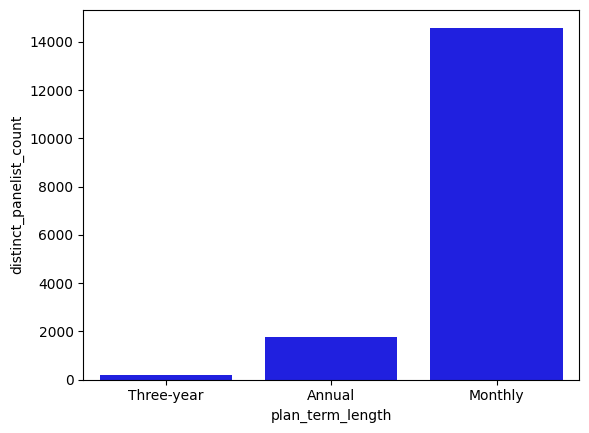

In [7]:
# Group by 'plan_term_length' and count distinct 'panelist_id'
df_distinct_counts = df_netflix.groupby('plan_term_length')['panelist_id'].nunique().reset_index(name='distinct_panelist_count')
df_distinct_counts = df_distinct_counts.sort_values(by='distinct_panelist_count', ascending=True)
sns.barplot(data=df_distinct_counts, x='plan_term_length', y='distinct_panelist_count', color= "blue")

plt.show()


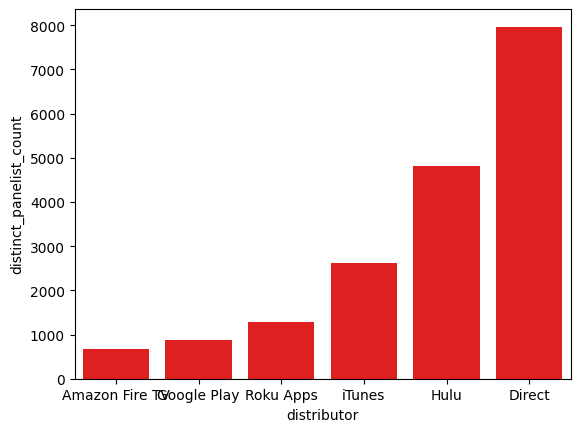

In [8]:
import matplotlib.pyplot as plt

# Group by 'distributor' and count distinct 'panelist_id'
df_distinct_counts = df_netflix.groupby('distributor')['panelist_id'].nunique().reset_index(name='distinct_panelist_count')
df_distinct_counts = df_distinct_counts.sort_values(by='distinct_panelist_count', ascending=True)
sns.barplot(data=df_distinct_counts, x='distributor', y='distinct_panelist_count', color= "red")

plt.show()


In [9]:
df = df[df['service']!= "Netflix"]

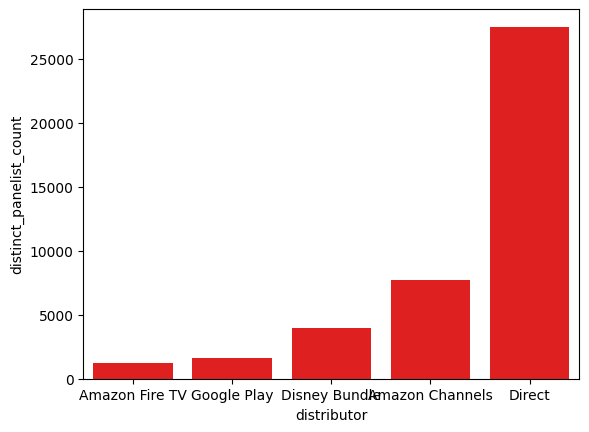

In [10]:
# Group by 'distributor' and count distinct 'panelist_id'
df_distinct_counts = df.groupby('distributor')['panelist_id'].nunique().reset_index(name='distinct_panelist_count').head()
df_distinct_counts = df_distinct_counts.sort_values(by='distinct_panelist_count', ascending=True)
sns.barplot(data=df_distinct_counts, x='distributor', y='distinct_panelist_count', color= "red")

plt.show()

In [11]:
df[df['panelist_id'] == 2].sort_values(by= "time_period", ascending= False).head(8)


,Unnamed: 0,panelist_id,time_period,service,distributor,plan_name,plan_term_length,plan_ads,subscriber,active_promos,age_group_name,current_service_tenure,customer_of_comcast,education_name,ethnicity_name_v2,gender_name,has_children,household_income_name_v2,is_cancel,is_gross_add,marital_status_name,monthly_price,monthly_promo_discount,num_prev_service_subs,state_name,subs_to_vmvpd,total_service_tenure,zip_code
1359221,1359221,2,2024-06,Disney+,Direct,Ad-Free,Monthly,Ad-Free,True,NaN,55+ years,3,False,Bachelor,White,F,False,$100-150k,False,False,Married,16.99,NaN,0.00,AL,False,3,36526
1062187,1062187,2,2024-06,Vix,Roku Apps,Vix with Epix,Monthly,Ad-Free,True,NaN,55+ years,48+,False,Bachelor,White,F,False,$100-150k,False,False,Married,11.99,NaN,0.00,AL,False,48+,36526
569351,569351,2,2024-06,Max,Direct,NaN,NaN,NaN,True,NaN,55+ years,48+,False,Bachelor,White,F,False,$100-150k,False,False,Married,NaN,NaN,0.00,AL,False,48+,36526
805501,805501,2,2024-05,Disney+,Direct,Ad-Free,Monthly,Ad-Free,True,NaN,55+ years,2,False,Bachelor,White,F,False,$100-150k,False,False,Married,15.99,NaN,0.00,AL,False,2,36526
940166,940166,2,2024-05,Max,Direct,NaN,NaN,NaN,True,NaN,55+ years,48+,False,Bachelor,White,F,False,$100-150k,False,False,Married,NaN,NaN,0.00,AL,False,48+,36526
1156868,1156868,2,2024-05,Vix,Roku Apps,Vix with Epix,Monthly,Ad-Free,True,NaN,55+ years,48+,False,Bachelor,White,F,False,$100-150k,False,False,Married,11.99,NaN,0.00,AL,False,48+,36526
1089412,1089412,2,2024-04,Disney+,Direct,Ad-Free,Monthly,Ad-Free,True,NaN,55+ years,1,False,Bachelor,White,F,False,$100-150k,False,True,Married,15.99,NaN,0.00,AL,False,1,36526
1308431,1308431,2,2024-04,Vix,Roku Apps,Vix with Epix,Monthly,Ad-Free,True,NaN,55+ years,48+,False,Bachelor,White,F,False,$100-150k,False,False,Married,11.99,NaN,0.00,AL,False,48+,36526


C:\Users\santi\AppData\Local\Temp\ipykernel_19488\2679485567.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=grip_rate_df, x='service', y='grip_rate', palette="viridis")


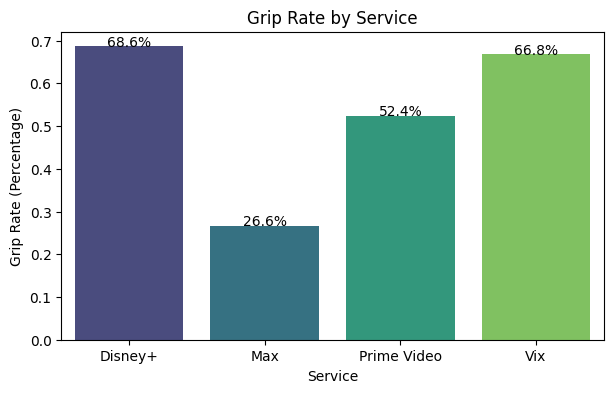

In [12]:
# Total distinct subscribers for each service
total_subscribers = df.groupby('service')['panelist_id'].nunique().reset_index(name='total_distinct_subscribers')

# Distinct new subscribers (grip rate) where is_gross_add is True
new_subscribers = (
    df[df['is_gross_add'] == True]
    .groupby('service')['panelist_id']
    .nunique()
    .reset_index(name='distinct_new_subscribers')
)

# Merge the two DataFrames on 'service' to get both total and new subscriber counts
grip_rate_df = pd.merge(total_subscribers, new_subscribers, on='service')

# Calculate grip rate as the percentage of new subscribers over total subscribers
grip_rate_df['grip_rate'] = grip_rate_df['distinct_new_subscribers'] / grip_rate_df['total_distinct_subscribers']

# Set the figure size
plt.figure(figsize=(7, 4))

# Plot using sns.barplot for the grip rate
barplot = sns.barplot(data=grip_rate_df, x='service', y='grip_rate', palette="viridis")

# Add text annotations to display grip rate as percentages
for index, row in grip_rate_df.iterrows():
    barplot.text(index, row.grip_rate, f"{row.grip_rate:.1%}", color='black', ha="center")

# Customize the plot
plt.title('Grip Rate by Service')
plt.xlabel('Service')
plt.ylabel('Grip Rate (Percentage)')

# Show the plot
plt.show()

C:\Users\santi\AppData\Local\Temp\ipykernel_19488\574118257.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=churn_rate_df, x='service', y='churn_rate', palette="coolwarm")


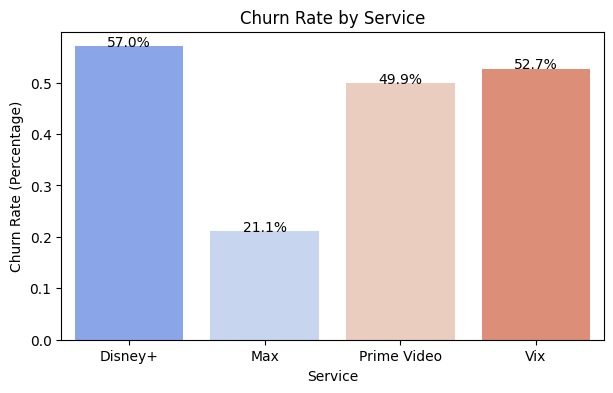

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total distinct subscribers for each service
total_subscribers = df.groupby('service')['panelist_id'].nunique().reset_index(name='total_distinct_subscribers')

# Distinct canceled subscribers (churn rate) where is_cancel is True
canceled_subscribers = (
    df[df['is_cancel'] == True]
    .groupby('service')['panelist_id']
    .nunique()
    .reset_index(name='distinct_canceled_subscribers')
)

# Merge the two DataFrames on 'service' to get both total and canceled subscriber counts
churn_rate_df = pd.merge(total_subscribers, canceled_subscribers, on='service', how='left')

# Fill missing canceled subscribers with 0 (in case there are no cancellations for a service)
churn_rate_df['distinct_canceled_subscribers'] = churn_rate_df['distinct_canceled_subscribers'].fillna(0)

# Calculate churn rate as the percentage of canceled subscribers over total subscribers
churn_rate_df['churn_rate'] = churn_rate_df['distinct_canceled_subscribers'] / churn_rate_df['total_distinct_subscribers']

# Set the figure size
plt.figure(figsize=(7, 4))

# Plot using sns.barplot for the churn rate
barplot = sns.barplot(data=churn_rate_df, x='service', y='churn_rate', palette="coolwarm")

# Add text annotations to display churn rate as percentages
for index, row in churn_rate_df.iterrows():
    barplot.text(index, row.churn_rate, f"{row.churn_rate:.1%}", color='black', ha="center")

# Customize the plot
plt.title('Churn Rate by Service')
plt.xlabel('Service')
plt.ylabel('Churn Rate (Percentage)')

# Show the plot
plt.show()


In [14]:
# IDEA: multiply the service price by the tenure to have variable of customer lifetime value

df['total_service_tenure'].value_counts().head()

total_service_tenure
48+    457065
1       22192
2       21110
3       20970
4       20729
Name: count, dtype: int64

In [15]:
df['panelist_service_id'] = df['panelist_id'].astype(str) + df['service']

In [16]:
# We are going to create CUSTOMER LIFETIME VALUE DF

clv = df.sort_values(by= "time_period", ascending= False)

In [17]:
clv.shape

(1161242, 29)

In [18]:
clv = clv.drop_duplicates(subset=['panelist_service_id'], keep='first')

In [19]:
clv['total_service_tenure']= clv['total_service_tenure'].fillna(0)
clv['total_service_tenure']= clv['total_service_tenure'].replace({"48+":"48"}).astype(int)
clv['monthly_promo_discount']= clv['monthly_promo_discount'].fillna(0)

In [20]:
# Calculate net monthly price so we can obtain customer lifetime value estimate

clv['net_monthly_price'] =  clv['monthly_price'] - clv['monthly_promo_discount']
clv['clv'] = clv['net_monthly_price'] * clv['total_service_tenure']
clv.head()

,Unnamed: 0,panelist_id,time_period,service,distributor,plan_name,plan_term_length,plan_ads,subscriber,active_promos,age_group_name,current_service_tenure,customer_of_comcast,education_name,ethnicity_name_v2,gender_name,has_children,household_income_name_v2,is_cancel,is_gross_add,marital_status_name,monthly_price,monthly_promo_discount,num_prev_service_subs,state_name,subs_to_vmvpd,total_service_tenure,zip_code,panelist_service_id,net_monthly_price,clv
818910,818910,1548,2024-06,Prime Video,Direct,Standard,Monthly,Ad-Supported,True,Black Friday 2023,45-54 years,8,True,GradDegree,White,F,True,Less than $50k,False,False,NaN,7.99,7.00,1.00,IL,False,19,60564,1548Prime Video,0.99,18.81
649940,649940,48920,2024-06,Disney+,Google Play,Ad-Free,Monthly,Ad-Free,True,NaN,35-44 years,18,False,Bachelor,White,M,False,$200k+,False,False,NaN,16.99,0.00,0.00,FL,False,18,33129,48920Disney+,16.99,305.82
1164690,1164690,9289,2024-06,Prime Video,iTunes,Standard,Monthly,Ad-Supported,True,NaN,55+ years,3,False,GradDegree,Black,F,True,$50-100k,False,False,Married,7.99,0.00,4.00,IL,False,48,60611,9289Prime Video,7.99,383.52
243749,243749,34924,2024-06,Max,Direct,Premium,Monthly,Ad-Free,True,NaN,55+ years,23,True,SomeCollege,White,F,True,$100-150k,False,False,Married,22.99,0.00,0.00,MI,False,23,49402,34924Max,22.99,528.77
243730,243730,9673,2024-06,Disney+,Google Play,With Ads,Monthly,Ad-Supported,True,NaN,45-54 years,8,False,HighSchool,White,M,True,$50-100k,False,False,Married,9.99,0.00,0.00,MO,False,8,64131,9673Disney+,9.99,79.92


Text(0.5, 1.0, 'GRIP BY SERVICE')

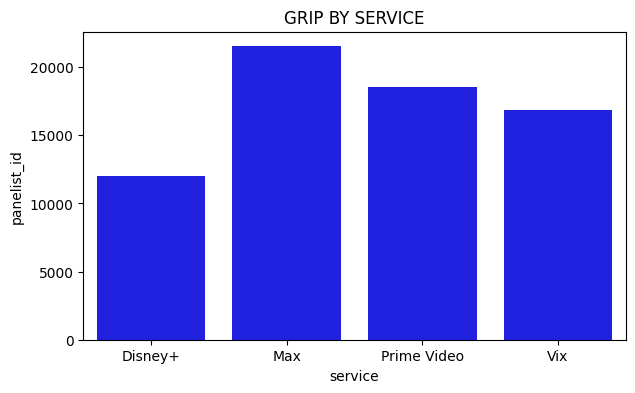

In [21]:
# GRIP BY SERVICE

clv_grip_by_service = clv.groupby('service')['panelist_id'].count().reset_index()

# Set the figure size for the plot
plt.figure(figsize=(7, 4))

# Plot the sum of 'clv' by 'service' using a bar plot
barplot = sns.barplot(data=clv_grip_by_service, x='service', y='panelist_id', color= "blue")
barplot.set_title("GRIP BY SERVICE")

Text(0.5, 1.0, 'ACTIVE GRIP BY SERVICE')

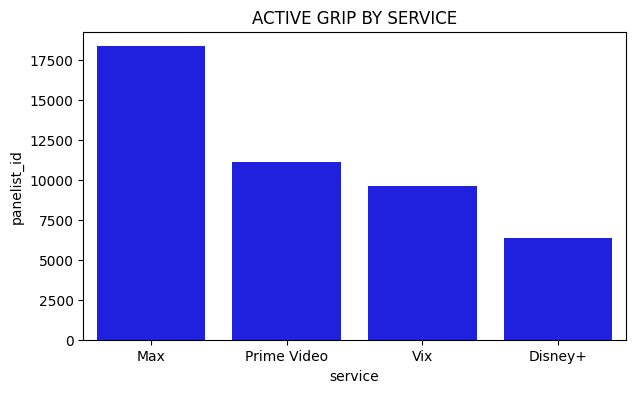

In [22]:
# ACTIVE GRIP BY SERVICE

clv_grip_by_service = clv.loc[(clv['subscriber'] == True) & (clv['time_period'] == "2024-06")].groupby('service')['panelist_id'].count().reset_index()
clv_grip_by_service = clv_grip_by_service.sort_values('panelist_id', ascending=False)

plt.figure(figsize=(7, 4))

barplot = sns.barplot(data=clv_grip_by_service, x='service', y='panelist_id', color= "blue")
barplot.set_title("ACTIVE GRIP BY SERVICE")

([<matplotlib.patches.Wedge at 0x1ac5d2fd220>,
 [Text(0.3281054744832004, 1.0499270439483661, 'Max'),
  Text(-1.0857634010957935, -0.17640248535917866, 'Prime Video'),
  Text(0.02556245661240857, -1.099702942076604, 'Vix'),
  Text(0.9948947139579716, -0.46923822109722274, 'Disney+')],
 [Text(0.178966622445382, 0.5726874785172905, '40.4%'),
  Text(-0.5922345824158873, -0.0962195374686429, '24.4%'),
  Text(0.013943158152222855, -0.5998379684054204, '21.2%'),
  Text(0.5426698439770753, -0.2559481205984851, '14.0%')])

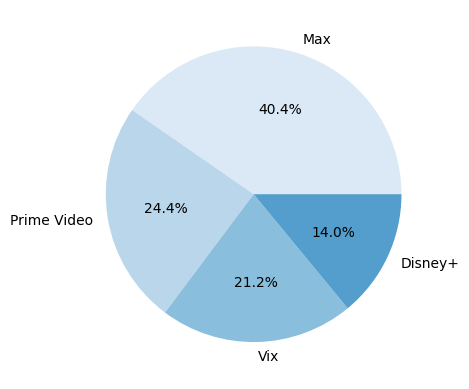

In [23]:
plt.pie(clv_grip_by_service['panelist_id'], labels=clv_grip_by_service['service'], autopct='%1.1f%%', colors=sns.color_palette("Blues"))

Text(0.5, 1.0, 'CUSTOMER LIFETIME VALUE BY SERVICE')

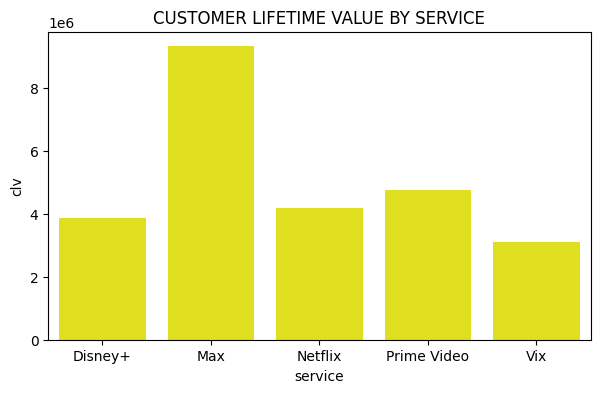

In [237]:
clv_sum_by_service = clv.groupby('service')['clv'].sum().reset_index()
# Set the figure size for the plot
plt.figure(figsize=(7, 4))

# Plot the sum of 'clv' by 'service' using a bar plot
barplot = sns.barplot(data=clv_sum_by_service, x='service', y='clv', color="yellow")
barplot.set_title("CUSTOMER LIFETIME VALUE BY SERVICE")


In [25]:
clv_sum_by_service

,service,clv
0,Disney+,2663684.26
1,Max,7779553.35
2,Prime Video,3226379.33
3,Vix,2297283.48


In [26]:
df.panelist_id.nunique()

29864

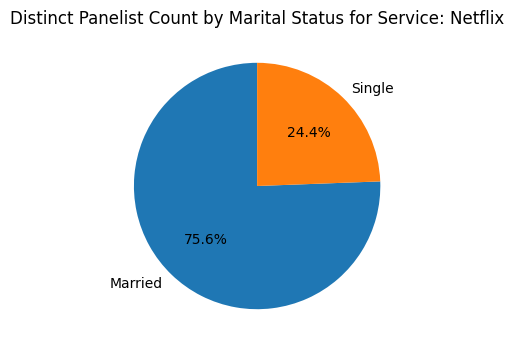

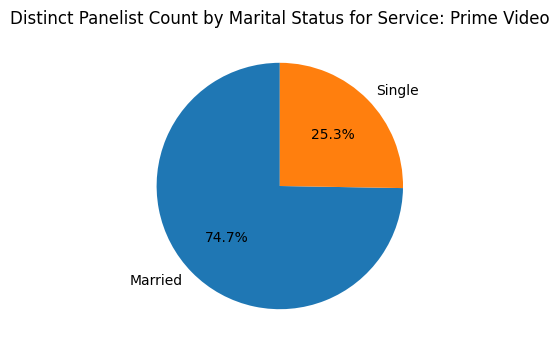

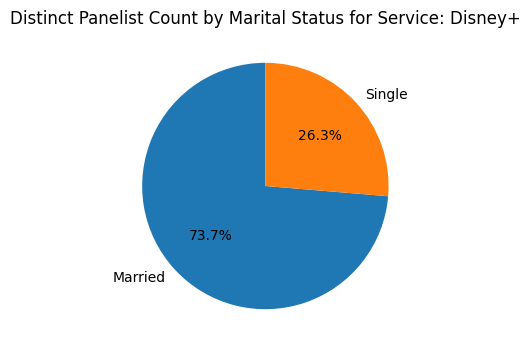

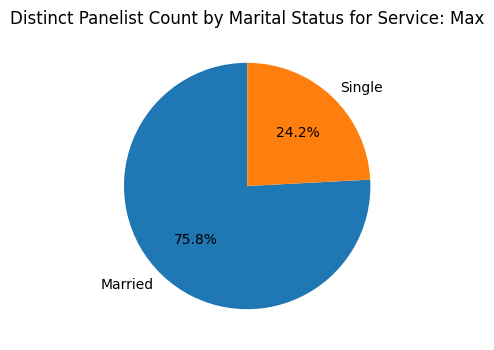

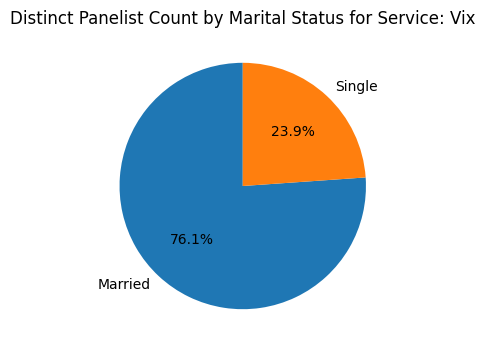

In [234]:
# Loop through each unique value in the 'service' column
for service_value in df['service'].unique():
    # Filter the DataFrame for the current service value
    df_service = df[df['service'] == service_value]
    
    # Group by 'marital_status' and count distinct 'panelist_id'
    df_marital_counts = df_service.groupby('marital_status_name')['panelist_id'].nunique().reset_index(name='distinct_panelist_count')
    
    # Plot the pie chart
    plt.figure(figsize=(7, 4))
    plt.pie(df_marital_counts['distinct_panelist_count'], labels=df_marital_counts['marital_status_name'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distinct Panelist Count by Marital Status for Service: {service_value}')
    
    # Display each pie chart
    plt.show()


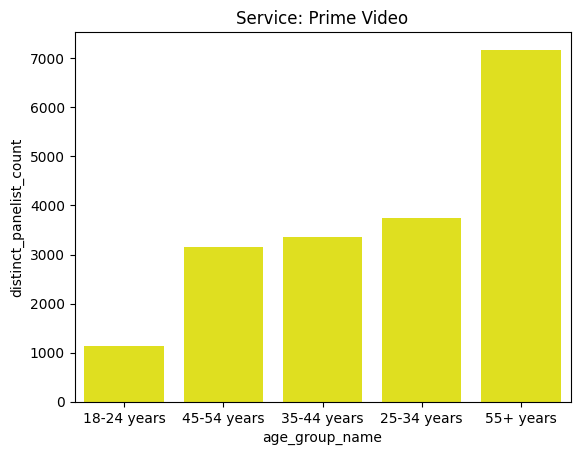

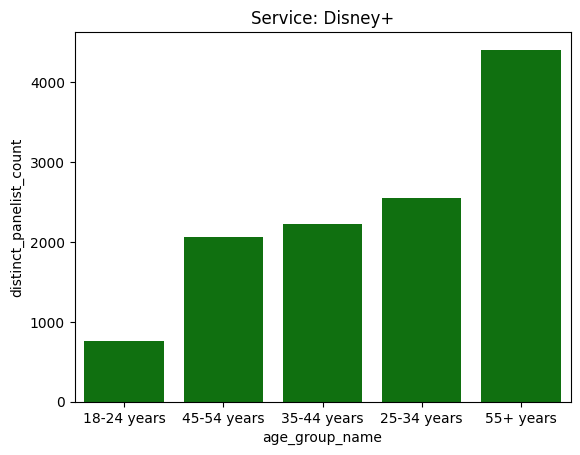

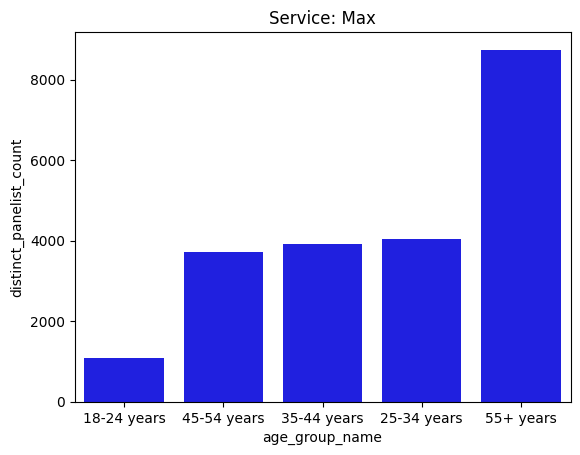

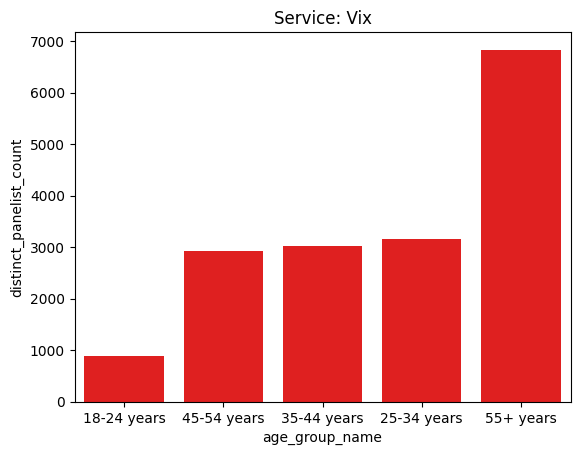

In [28]:
# Get unique services
services = df['service'].unique()

# Define colors for each service
colors = ['yellow', 'green', 'blue', 'red']

# Plot for each service
for i, service in enumerate(services):
    df_service = df[df['service'] == service]
    
    # Group by 'age_group_name' and count distinct 'panelist_id'
    df_distinct_counts = df_service.groupby('age_group_name')['panelist_id'].nunique().reset_index(name='distinct_panelist_count')
    df_distinct_counts = df_distinct_counts.sort_values(by='distinct_panelist_count', ascending=True)
    
    # Plot the bar plot
    sns.barplot(data=df_distinct_counts, x='age_group_name', y='distinct_panelist_count', color=colors[i])
    plt.title(f"Service: {service}")
    plt.show()

**MACHINE LEARNING DATA PREPARATION**

In [114]:
df=pd.read_csv('./Downloads/Data.csv', delimiter=",")

In [68]:
df.head(2)

,Unnamed: 0,panelist_id,time_period,service,distributor,plan_name,plan_term_length,plan_ads,subscriber,active_promos,age_group_name,current_service_tenure,customer_of_comcast,education_name,ethnicity_name_v2,gender_name,has_children,household_income_name_v2,is_cancel,is_gross_add,marital_status_name,monthly_price,monthly_promo_discount,num_prev_service_subs,state_name,subs_to_vmvpd,total_service_tenure,zip_code
0,0,20492,2023-10,Netflix,Hulu,Trio Premium Bundle,Monthly,Ad-Free,True,NaN,55+ years,7,False,GradDegree,White,M,False,$150-200k,False,False,NaN,8.33,NaN,1.00,NY,True,47,12065
1,1,15395,2024-05,Netflix,Hulu,Trio Premium Bundle,Monthly,Ad-Free,True,NaN,45-54 years,27,False,Bachelor,White,F,False,$50-100k,False,False,Married,8.33,NaN,2.00,VA,True,48+,22601


In [115]:
df['panelist_service_id'] = df['panelist_id'].astype(str) + df['service']

In [116]:
# Let's create CUSTOMER LIFETIME VALUE DF

clv = df.copy()
clv.dropna(subset=['total_service_tenure'], inplace=True)
clv = clv.sort_values(by= "time_period", ascending= False)

In [117]:
clv = clv.sort_values(by= "time_period", ascending= False)
clv = clv.drop_duplicates(subset=['panelist_service_id'], keep='first')

In [105]:
clv[clv['panelist_id'] == 99998]

,Unnamed: 0,panelist_id,time_period,service,distributor,plan_name,plan_term_length,plan_ads,subscriber,active_promos,age_group_name,current_service_tenure,customer_of_comcast,education_name,ethnicity_name_v2,gender_name,has_children,household_income_name_v2,is_cancel,is_gross_add,marital_status_name,monthly_price,monthly_promo_discount,num_prev_service_subs,state_name,subs_to_vmvpd,total_service_tenure,zip_code,panelist_service_id
1001085,1001085,99998,2024-06,Max,Direct,Standard,Monthly,Ad-Free,True,NaN,25-34 years,48+,True,HighSchool,Asian,F,False,Less than $50k,False,False,Single,15.49,NaN,1.00,WA,True,48+,98008,99998Max
1182171,1182171,99998,2024-05,Disney+,Direct,Ad-Free,Monthly,Ad-Free,True,NaN,25-34 years,6,True,HighSchool,Asian,F,False,Less than $50k,False,False,Single,15.99,NaN,0.00,WA,True,6,98008,99998Disney+
255333,255333,99998,2022-07,Prime Video,Direct,Standard,Monthly,Ad-Supported,True,NaN,25-34 years,3,True,HighSchool,Asian,F,False,Less than $50k,False,False,Single,6.99,NaN,0.00,WA,True,3,98008,99998Prime Video


In [118]:
clv['total_service_tenure']= clv['total_service_tenure'].fillna(0)
# I will leave instead of 48+ just a constant mean arbitrary value >48 I consider for simplicity of the model: 50
clv['total_service_tenure']= clv['total_service_tenure'].replace({"48+":"50"}).astype(int)
clv['monthly_promo_discount']= clv['monthly_promo_discount'].fillna(0)

In [119]:
# Calculate net monthly price so we can obtain customer lifetime value estimate

clv['net_monthly_price'] =  clv['monthly_price'] - clv['monthly_promo_discount']
clv['clv'] = clv['net_monthly_price'] * clv['total_service_tenure']

In [35]:
# Now i have clv for each panelist by each service,

In [120]:
customer_lifetime_value = clv[['panelist_service_id','panelist_id','clv']].sort_values(by= "panelist_id", ascending= False)

In [127]:
df[(df['panelist_id'] == 30794) & (df['service'] == "Prime Video")].head()

,Unnamed: 0,panelist_id,time_period,service,distributor,plan_name,plan_term_length,plan_ads,subscriber,active_promos,age_group_name,current_service_tenure,customer_of_comcast,education_name,ethnicity_name_v2,gender_name,has_children,household_income_name_v2,is_cancel,is_gross_add,marital_status_name,monthly_price,monthly_promo_discount,num_prev_service_subs,state_name,subs_to_vmvpd,total_service_tenure,zip_code,panelist_service_id,clv
4,4,30794,2023-07,Prime Video,Direct,NaN,NaN,NaN,True,NaN,55+ years,48+,False,HighSchool,White,M,False,$50-100k,False,False,Married,NaN,NaN,0.00,ID,False,48+,83301,30794Prime Video,NaN
83890,83890,30794,2022-07,Prime Video,Direct,NaN,NaN,NaN,True,NaN,55+ years,48+,False,HighSchool,White,M,False,$50-100k,False,False,Married,NaN,NaN,0.00,ID,False,48+,83301,30794Prime Video,NaN
86862,86862,30794,2022-10,Prime Video,Direct,NaN,NaN,NaN,True,NaN,55+ years,48+,False,HighSchool,White,M,False,$50-100k,False,False,Married,NaN,NaN,0.00,ID,False,48+,83301,30794Prime Video,NaN
96737,96737,30794,2023-03,Prime Video,Direct,NaN,NaN,NaN,True,NaN,55+ years,48+,False,HighSchool,White,M,False,$50-100k,False,False,Married,NaN,NaN,0.00,ID,False,48+,83301,30794Prime Video,NaN
116605,116605,30794,2023-02,Prime Video,Direct,NaN,NaN,NaN,True,NaN,55+ years,48+,False,HighSchool,White,M,False,$50-100k,False,False,Married,NaN,NaN,0.00,ID,False,48+,83301,30794Prime Video,NaN


In [64]:
# Add: clv = df.dropna(subset= "total_service_tenure", inplace= True), 
#code up there to prevent clv being 0 when tenure value is nan. In other words keep MAX tenure by panelist

In [124]:
# Merging df and customer_lifetime_value DataFrames on 'panelist_service_id' using a left join
df=pd.merge(df, customer_lifetime_value[['panelist_service_id','clv']], how="left", on="panelist_service_id")


In [128]:
df['clv']  = df['clv'].fillna(0)

In [134]:
df= df.drop(columns='Unnamed: 0')

In [207]:
train_data = df[df['service']!= "Netflix"]
test_data  = df[df['service']== "Netflix"]

In [137]:
train_data.shape

(1161242, 29)

In [138]:
test_data.shape

(269361, 29)

In [140]:
train_data.head(2)

,panelist_id,time_period,service,distributor,plan_name,plan_term_length,plan_ads,subscriber,active_promos,age_group_name,current_service_tenure,customer_of_comcast,education_name,ethnicity_name_v2,gender_name,has_children,household_income_name_v2,is_cancel,is_gross_add,marital_status_name,monthly_price,monthly_promo_discount,num_prev_service_subs,state_name,subs_to_vmvpd,total_service_tenure,zip_code,panelist_service_id,clv
4,30794,2023-07,Prime Video,Direct,NaN,NaN,NaN,True,NaN,55+ years,48+,False,HighSchool,White,M,False,$50-100k,False,False,Married,NaN,NaN,0.00,ID,False,48+,83301,30794Prime Video,0.00
5,44375,2023-06,Prime Video,Disney Bundle,Legacy Bundle,Monthly,Ad-Supported,True,NaN,55+ years,39,False,SomeCollege,White,F,False,$200k+,False,False,Married,5.00,NaN,1.00,SD,False,40,57702,44375Prime Video,316.50


In [208]:
# Sort data by panelist_id, service, and time_period
train_data = train_data.sort_values(['panelist_id', 'service', 'time_period'])

# Create the churn label for the next month, grouped by unique identifier
train_data['is_churn_next_month'] = train_data.groupby('panelist_service_id')['is_cancel'].shift(-1).fillna(0)
train_data['is_churn_next_month'] = train_data['is_churn_next_month'].astype(int)

features = [
    'age_group_name', 'education_name', 'ethnicity_name_v2', 'gender_name',
    'has_children', 'household_income_name_v2', 'marital_status_name', 
    'monthly_price', 'monthly_promo_discount', 'current_service_tenure', 
    'total_service_tenure', 'plan_ads', 'plan_term_length'
]

X_train = train_data


In [148]:
# Target variable "is_churn_next_month" is working beautifully thanks to GOD

X_train.loc[X_train['panelist_service_id'] == "99998Prime Video", 
                          ['panelist_service_id', 'time_period', 'is_cancel', 'is_churn_next_month']]

,panelist_service_id,time_period,is_cancel,is_churn_next_month
1201196,99998Prime Video,2022-06,False,0
255333,99998Prime Video,2022-07,False,1
697419,99998Prime Video,2022-08,True,0


In [149]:
X_train.head(2)

,panelist_id,time_period,service,distributor,plan_name,plan_term_length,plan_ads,subscriber,active_promos,age_group_name,current_service_tenure,customer_of_comcast,education_name,ethnicity_name_v2,gender_name,has_children,household_income_name_v2,is_cancel,is_gross_add,marital_status_name,monthly_price,monthly_promo_discount,num_prev_service_subs,state_name,subs_to_vmvpd,total_service_tenure,zip_code,panelist_service_id,clv,is_churn_next_month
960228,0,2022-06,Prime Video,Direct,Legacy Bundle,Monthly,Ad-Supported,True,NaN,55+ years,30,True,GradDegree,White,M,True,$100-150k,False,False,NaN,4.66,NaN,1.00,PA,False,36,18966,0Prime Video,316.50,0
115551,0,2022-07,Prime Video,Direct,Legacy Bundle,Monthly,Ad-Supported,True,NaN,55+ years,31,True,GradDegree,White,M,True,$100-150k,False,False,NaN,4.66,NaN,1.00,PA,False,37,18966,0Prime Video,316.50,0


In [156]:
X_train['service'].unique()

array(['Prime Video', 'Disney+', 'Max', 'Vix'], dtype=object)

In [157]:
X_train.dtypes

panelist_id                   int64
time_period                  object
service                      object
distributor                  object
plan_name                    object
plan_term_length             object
plan_ads                     object
subscriber                     bool
active_promos                object
age_group_name               object
current_service_tenure       object
customer_of_comcast            bool
education_name               object
ethnicity_name_v2            object
gender_name                  object
has_children                 object
household_income_name_v2     object
is_cancel                      bool
is_gross_add                   bool
marital_status_name          object
monthly_price               float64
monthly_promo_discount      float64
num_prev_service_subs       float64
state_name                   object
subs_to_vmvpd                  bool
total_service_tenure         object
zip_code                      int64
panelist_service_id         

In [210]:
categorical_columns = [
    'plan_ads',
    'age_group_name', 'education_name', 'ethnicity_name_v2', 'gender_name',
    'has_children', 'household_income_name_v2', 'marital_status_name', 'state_name'
]

# Apply one-hot encoding to each categorical column and concatenate with X_train
for col in categorical_columns:
    # Create one-hot encoded columns, replacing False/True with 0/1 for any boolean-like values
    one_hot = pd.get_dummies(X_train[col], prefix=col).replace({False: 0, True: 1})
    # Concatenate the new columns with X_train
    X_train = pd.concat([X_train, one_hot], axis=1)

# Drop the original categorical columns after encoding
X_train = X_train.drop(columns=categorical_columns)

# Preview the transformed X_train
X_train.head()


C:\Users\santi\AppData\Local\Temp\ipykernel_19488\2887401875.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot = pd.get_dummies(X_train[col], prefix=col).replace({False: 0, True: 1})
C:\Users\santi\AppData\Local\Temp\ipykernel_19488\2887401875.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot = pd.get_dummies(X_train[col], prefix=col).replace({False: 0, True: 1})
C:\Users\santi\AppData\Local\Temp\ipykernel_19488\2887401875.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

,panelist_id,time_period,service,distributor,plan_name,subscriber,active_promos,current_service_tenure,customer_of_comcast,is_cancel,is_gross_add,monthly_price,monthly_promo_discount,num_prev_service_subs,subs_to_vmvpd,total_service_tenure,zip_code,panelist_service_id,clv,is_churn_next_month,service_Disney+,service_Max,service_Prime Video,service_Vix,distributor_Amazon Channels,distributor_Amazon Fire TV,distributor_Direct,distributor_Disney Bundle,distributor_Google Play,distributor_Hulu,distributor_Roku Apps,distributor_The Roku Channel,distributor_YouTube Primetime Channels,distributor_YouTube TV,distributor_iTunes,plan_name_Ad-Free,plan_name_Basic,plan_name_CBS All Access/Showtime Bundle,plan_name_Disney+ + HBO Bundle,plan_name_Duo Basic,plan_name_Duo Premium,plan_name_Entertainment Plus Bundle,plan_name_Essential,plan_name_Legacy Bundle,plan_name_Limited Commercials,plan_name_Premium,plan_name_Standard,plan_name_Standard with Ads,plan_name_Student,plan_name_Trio Basic Bundle,plan_name_Trio Premium Bundle,plan_name_Ultimate Ad-Free,plan_name_Vix Bundle (Essential),plan_name_Vix Bundle (Premium),plan_name_Vix with Epix,plan_name_With Ads,plan_term_length_Annual,plan_term_length_Monthly,plan_term_length_Six-month,plan_ads_Ad-Free,plan_ads_Ad-Supported,age_group_name_18-24 years,age_group_name_25-34 years,age_group_name_35-44 years,age_group_name_45-54 years,age_group_name_55+ years,education_name_Bachelor,education_name_GradDegree,education_name_HighSchool,education_name_LessThanHS,education_name_SomeCollege,plan_term_length_Annual,plan_term_length_Monthly,plan_term_length_Six-month,plan_ads_Ad-Free,plan_ads_Ad-Supported,age_group_name_18-24 years,age_group_name_25-34 years,age_group_name_35-44 years,age_group_name_45-54 years,age_group_name_55+ years,education_name_Bachelor,education_name_GradDegree,education_name_HighSchool,education_name_LessThanHS,education_name_SomeCollege,ethnicity_name_v2_Asian,ethnicity_name_v2_Black,ethnicity_name_v2_Hispanic,ethnicity_name_v2_Other,ethnicity_name_v2_White,gender_name_F,gender_name_M,has_children_False,has_children_True,household_income_name_v2_$100-150k,household_income_name_v2_$150-200k,household_income_name_v2_$200k+,household_income_name_v2_$50-100k,household_income_name_v2_Less than $50k,marital_status_name_Married,marital_status_name_Single,state_name_AK,state_name_AL,state_name_AR,state_name_AZ,state_name_CA,state_name_CO,state_name_CT,state_name_DC,state_name_DE,state_name_FL,state_name_GA,state_name_HI,state_name_IA,state_name_ID,state_name_IL,state_name_IN,state_name_KS,state_name_KY,state_name_LA,state_name_MA,state_name_MD,state_name_ME,state_name_MI,state_name_MN,state_name_MO,state_name_MS,state_name_MT,state_name_NC,state_name_ND,state_name_NE,state_name_NH,state_name_NJ,state_name_NM,state_name_NV,state_name_NY,state_name_OH,state_name_OK,state_name_OR,state_name_PA,state_name_PR,state_name_RI,state_name_SC,state_name_SD,state_name_TN,state_name_TX,state_name_UT,state_name_VA,state_name_VT,state_name_WA,state_name_WI,state_name_WV,state_name_WY
960228,0,2022-06,Prime Video,Direct,Legacy Bundle,True,NaN,30,True,False,False,4.66,NaN,1.00,False,36,18966,0Prime Video,316.50,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
115551,0,2022-07,Prime Video,Direct,Legacy Bundle,True,NaN,31,True,False,False,4.66,NaN,1.00,False,37,18966,0Prime Video,316.50,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1058617,0,2022-08,Prime Video,Direct,Legacy Bundle,True,NaN,32,True,False,False,4.66,NaN,1.00,False,38,18966,0Prime Video,316.50,0,0,0,1,0,0,0,1

In [211]:
X_train['subscriber']             = X_train['subscriber'].replace({True: 1, False: 0})
X_train['customer_of_comcast']    = X_train['customer_of_comcast'].replace({True: 1, False: 0})
X_train['is_cancel']              = X_train['is_cancel'].replace({True: 1, False: 0})
X_train['is_gross_add']           = X_train['is_gross_add'].replace({True: 1, False: 0})
X_train['subs_to_vmvpd']          = X_train['subs_to_vmvpd'].replace({True: 1, False: 0})
X_train['monthly_promo_discount'] = X_train['monthly_promo_discount'].fillna(0)

C:\Users\santi\AppData\Local\Temp\ipykernel_19488\3371854069.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['subscriber']             = X_train['subscriber'].replace({True: 1, False: 0})
C:\Users\santi\AppData\Local\Temp\ipykernel_19488\3371854069.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['customer_of_comcast']    = X_train['customer_of_comcast'].replace({True: 1, False: 0})
C:\Users\santi\AppData\Local\Temp\ipykernel_19488\3371854069.py:3: FutureWarning: Downcasting behavior in `replace` is deprecat

In [229]:
X_train.columns

Index(['subscriber', 'current_service_tenure', 'customer_of_comcast',
       'is_cancel', 'is_gross_add', 'monthly_price', 'monthly_promo_discount',
       'num_prev_service_subs', 'subs_to_vmvpd', 'total_service_tenure',
       ...
       'state_name_TX', 'state_name_UT', 'state_name_VA', 'state_name_VT',
       'state_name_WA', 'state_name_WI', 'state_name_WV', 'state_name_WY',
       'year', 'month'],
      dtype='object', length=147)

In [174]:
X_train['current_service_tenure'].unique()

array(['31', 50, '1', 0, '6', '7', '16', '9', '11', '8', '2', '19', '29',
       '33', '4', '3', '12', '28', '24', '43', '20', '38', '22', '26',
       '25', '36', '35', '5', '42', '10', '32', '30', '23', '27', '18',
       '41', '13', '45', '14', '21', '15', '39', '37', '47', '34', '44',
       '40', '17', '46'], dtype=object)

In [212]:
# I am going to drop zip_code because I don´t think it has much of an impact if I also have the state and.. to save memory on my PC haha
X_train['zip_code'].nunique()
X_train= X_train.drop(columns={"zip_code",'active_promos','service','distributor','plan_name'})
test_data= test_data.drop(columns = "zip_code")

In [213]:
y_train = X_train["is_churn_next_month"]
X_train = X_train.drop(columns="is_churn_next_month")

In [214]:
X_train['total_service_tenure']   = X_train['total_service_tenure'].replace({"48+": 50})
X_train['current_service_tenure'] = X_train['current_service_tenure'].replace({"48+": 50})

X_train['total_service_tenure']   = X_train['total_service_tenure']  .fillna(0)
X_train['current_service_tenure'] = X_train['current_service_tenure'].fillna(0)

In [215]:
X_train['time_period'] = pd.to_datetime(X_train['time_period'], format='%Y-%m', errors='coerce')
X_train['year'] = X_train['time_period'].dt.year
X_train['month'] = X_train['time_period'].dt.month
X_train= X_train.drop(columns="time_period")

In [216]:
X_train.set_index('panelist_service_id')
X_train = X_train.drop(columns={'panelist_service_id','panelist_id'})

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Identify numerical features
numerical_features = [
    'monthly_price', 'monthly_promo_discount', 'current_service_tenure', 
    'total_service_tenure', 'num_prev_service_subs', 'clv'
]

# Step 2: Separate features and target variable
X = X_train  # Already preprocessed with one-hot encoding
y = y_train  # Target variable

# Step 3: Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the numerical features in both training and testing sets
scaler = StandardScaler()

# Fit the scaler on the training data only, and transform both training and testing data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 5: Initialize and fit the RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
clf.fit(X_train, y_train)

# Step 6: Predict churn on the test set
y_pred = clf.predict(X_test)

# Step 7: Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9675671020834342
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    179773
           1       0.00      0.00      0.00      6026

    accuracy                           0.97    185799
   macro avg       0.48      0.50      0.49    185799
weighted avg       0.94      0.97      0.95    185799



C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [190]:
search_value = '96857Max'
columns_with_value = X_train.columns[X_train.isin([search_value]).any()].tolist()
columns_with_value

['panelist_service_id']

**TRAINING OUR CHURN PREDICITION MODEL**

In [218]:
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Save the trained model for later predictions
joblib.dump(model, 'churn_prediction_model.pkl')

['churn_prediction_model.pkl']

**NETFLIX (TEST) DATA PREPARATION**

In [219]:
# Sort data by panelist_id, service, and time_period
test_data = test_data.sort_values(['panelist_id', 'service', 'time_period'])

# Create the churn label for the next month, grouped by unique identifier
test_data['is_churn_next_month'] = test_data.groupby('panelist_service_id')['is_cancel'].shift(-1).fillna(0)
test_data['is_churn_next_month'] = test_data['is_churn_next_month'].astype(int)

# Define features and target
features = [
    'age_group_name', 'education_name', 'ethnicity_name_v2', 'gender_name',
    'has_children', 'household_income_name_v2', 'marital_status_name', 
    'monthly_price', 'monthly_promo_discount', 'current_service_tenure', 
    'total_service_tenure', 'plan_ads', 'plan_term_length'
]
target = 'is_churn_next_month'

X_test = test_data


In [222]:
X_test= X_test.drop(columns={'active_promos','service','distributor','plan_name'})

In [223]:
bu = X_test.copy()

In [224]:
categorical_columns = [
     'plan_term_length', 'plan_ads',
    'age_group_name', 'education_name', 'ethnicity_name_v2', 'gender_name',
    'has_children', 'household_income_name_v2', 'marital_status_name', 'state_name'
]

# Apply one-hot encoding to each categorical column and concatenate with X_train
for col in categorical_columns:
    # Create one-hot encoded columns, replacing False/True with 0/1 for any boolean-like values
    one_hot = pd.get_dummies(X_test[col], prefix=col).replace({False: 0, True: 1})
    # Concatenate the new columns with X_train
    X_test = pd.concat([X_test, one_hot], axis=1)

# Drop the original categorical columns after encoding
X_test = X_test.drop(columns=categorical_columns)


X_test['subscriber']             = X_test['subscriber'].replace({True: 1, False: 0})
X_test['customer_of_comcast']    = X_test['customer_of_comcast'].replace({True: 1, False: 0})
X_test['is_cancel']              = X_test['is_cancel'].replace({True: 1, False: 0})
X_test['is_gross_add']           = X_test['is_gross_add'].replace({True: 1, False: 0})
X_test['subs_to_vmvpd']          = X_test['subs_to_vmvpd'].replace({True: 1, False: 0})
X_test['monthly_promo_discount'] = X_test['monthly_promo_discount'].fillna(0)

C:\Users\santi\AppData\Local\Temp\ipykernel_19488\1174495158.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot = pd.get_dummies(X_test[col], prefix=col).replace({False: 0, True: 1})
C:\Users\santi\AppData\Local\Temp\ipykernel_19488\1174495158.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot = pd.get_dummies(X_test[col], prefix=col).replace({False: 0, True: 1})
C:\Users\santi\AppData\Local\Temp\ipykernel_19488\1174495158.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

In [225]:
y_test = X_test["is_churn_next_month"]
X_test = X_test.drop(columns="is_churn_next_month")
X_test['total_service_tenure']   = X_test['total_service_tenure'].replace({"48+": 50})
X_test['current_service_tenure'] = X_test['current_service_tenure'].replace({"48+": 50})
X_test['total_service_tenure']   = X_test['total_service_tenure']  .fillna(0)
X_test['current_service_tenure'] = X_test['current_service_tenure'].fillna(0)

In [226]:
X_test['time_period'] = pd.to_datetime(X_test['time_period'], format='%Y-%m', errors='coerce')
X_test['year']  = X_test['time_period'].dt.year
X_test['month'] = X_test['time_period'].dt.month
X_test= X_test.drop(columns="time_period")

In [227]:
X_test.set_index('panelist_service_id')
X_test = X_test.drop(columns={'panelist_service_id','panelist_id'})

In [205]:
X_test.head(1)

,subscriber,current_service_tenure,customer_of_comcast,is_cancel,is_gross_add,monthly_price,monthly_promo_discount,num_prev_service_subs,subs_to_vmvpd,total_service_tenure,clv,service_Netflix,distributor_Amazon Fire TV,distributor_Direct,distributor_Google Play,distributor_Hulu,distributor_Roku Apps,distributor_iTunes,plan_name_Basic,plan_name_Duo Basic,plan_name_Duo Premium,plan_name_Legacy Bundle,plan_name_Premium,plan_name_Trio Basic Bundle,plan_name_Trio Premium Bundle,plan_term_length_Annual,plan_term_length_Monthly,plan_term_length_Three-year,plan_ads_Ad-Free,plan_ads_Ad-Supported,age_group_name_18-24 years,age_group_name_25-34 years,age_group_name_35-44 years,age_group_name_45-54 years,age_group_name_55+ years,education_name_Bachelor,education_name_GradDegree,education_name_HighSchool,education_name_LessThanHS,education_name_SomeCollege,ethnicity_name_v2_Asian,ethnicity_name_v2_Black,ethnicity_name_v2_Hispanic,ethnicity_name_v2_Other,ethnicity_name_v2_White,gender_name_F,gender_name_M,has_children_False,has_children_True,household_income_name_v2_$100-150k,household_income_name_v2_$150-200k,household_income_name_v2_$200k+,household_income_name_v2_$50-100k,household_income_name_v2_Less than $50k,marital_status_name_Married,marital_status_name_Single,state_name_AK,state_name_AL,state_name_AR,state_name_AZ,state_name_CA,state_name_CO,state_name_CT,state_name_DC,state_name_DE,state_name_FL,state_name_GA,state_name_HI,state_name_IA,state_name_ID,state_name_IL,state_name_IN,state_name_KS,state_name_KY,state_name_LA,state_name_MA,state_name_MD,state_name_ME,state_name_MI,state_name_MN,state_name_MO,state_name_MS,state_name_MT,state_name_NC,state_name_ND,state_name_NE,state_name_NH,state_name_NJ,state_name_NM,state_name_NV,state_name_NY,state_name_OH,state_name_OK,state_name_OR,state_name_PA,state_name_RI,state_name_SC,state_name_SD,state_name_TN,state_name_TX,state_name_UT,state_name_VA,state_name_VT,state_name_WA,state_name_WI,state_name_WV,state_name_WY,active_promos_Black Friday 2023,active_promos_Disney+ Day 2022,active_promos_February 2023 Promotion,active_promos_September 2023 Promotion,year,month
502489,1,20,1,0,0,4.66,0.00,0.00,0,20,278.52,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022,6


In [230]:
# Handle missing columns from train data
train_columns = X_train.columns

# Get the columns present in X_test
test_columns = X_test.columns

# Find missing columns in X_test that are in X_train
missing_in_test = set(train_columns) - set(test_columns)

# Add the missing columns to X_test with values set to 0
for col in missing_in_test:
    X_test[col] = 0

# Remove any extra columns in X_test that were not in X_train
extra_in_test = set(test_columns) - set(train_columns)
X_test = X_test.drop(columns=extra_in_test)

# Ensure the column order matches exactly between X_train and X_test
X_test = X_test[train_columns]

In [231]:
model = joblib.load('churn_prediction_model.pkl')
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9675157131136282
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    260611
           1       0.00      0.00      0.00      8750

    accuracy                           0.97    269361
   macro avg       0.48      0.50      0.49    269361
weighted avg       0.94      0.97      0.95    269361



C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\santi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [233]:
from sklearn.ensemble import RandomForestClassifier

# Set up Random Forest with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9660439507209404
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    179773
           1       0.18      0.01      0.02      6026

    accuracy                           0.97    185799
   macro avg       0.57      0.51      0.50    185799
weighted avg       0.94      0.97      0.95    185799

